In [1]:
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
class irregular_dilation_conv(nn.Module):
    def __init__(self):
        super(irregular_dilation_conv, self).__init__()
        self.harmonic_conv = nn.Conv2d(1, 1, padding='same', kernel_size=(57,3), stride=1, bias=False)
    def forward(self, x):
        x = self.harmonic_conv(x)
        return x

In [3]:
model = irregular_dilation_conv()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-1)

In [4]:
mask_inner = torch.zeros((57,3))
mask_inner[[0,1,4,8,9,16,28,40,47,48,52,55,56]] = 1

mask = torch.Tensor(mask_inner).unsqueeze(0).unsqueeze(0)
model.harmonic_conv.weight.data *= mask

# 这种修改weight的方法会让optim.step报废（？）
# zerot = model.harmonic_conv.weight.data[0,0]
# zerot[2:4] *= 0
# zerow = torch.Tensor(zerot).unsqueeze(0).unsqueeze(0)
# model.harmonic_conv.weight = torch.nn.Parameter(zerow)
# model.harmonic_conv.weight

# print(model.harmonic_conv.weight,'\n\n')

In [6]:
in_data = np.load('../../gdoras_dataset/normalized/cqts_padded_1937x72/100000.cqt.npy')
in_data = torch.tensor(in_data).unsqueeze(0).unsqueeze(0).to(torch.float32)

In [8]:
std = np.load('../../gdoras_dataset/normalized/multif0_cqts_padded_1937x72/100000.multif0_cqt.npy')
std = torch.tensor(std).unsqueeze(0).unsqueeze(0).to(torch.float32)

for i in range(1000):
    
    out = model(in_data)
    
    loss = loss_fn(out, std)
    model.zero_grad()

    loss.backward()
#     print(model.harmonic_conv.weight.grad)
    model.harmonic_conv.weight.grad *= mask
#     print(model.harmonic_conv.weight.grad)
#     print(model.harmonic_conv.weight)
    optimizer.step()
#     print(model.harmonic_conv.weight)
    print(loss.item())

0.01005824375897646
2.4111328125
0.1614866703748703
0.5285491943359375
1.3799729347229004
1.004550576210022
0.25962087512016296
0.012724163010716438
0.34606096148490906
0.6823491454124451
0.6089690327644348
0.2693386673927307
0.022851862013339996
0.06133553758263588
0.266617089509964
0.37863925099372864
0.2872066795825958
0.10384723544120789
0.0050865961238741875
0.05705747380852699
0.1696774959564209
0.2092083841562271
0.13962320983409882
0.03940016031265259
0.004046024288982153
0.049983762204647064
0.10958506911993027
0.11300075799226761
0.060640428215265274
0.010747277177870274
0.009921280667185783
0.0462363064289093
0.0704444944858551
0.05473320558667183
0.01945296861231327
0.0032520745880901814
0.0178739745169878
0.03910643607378006
0.039453331381082535
0.019892025738954544
0.004223037511110306
0.00805873703211546
0.021879049018025398
0.026079494506120682
0.015866560861468315
0.004659096244722605
0.005004662089049816
0.013412176631391048
0.017132755368947983
0.011446021497249603
0

0.0028728339821100235
0.0028727715834975243
0.0028727096505463123
0.0028726484160870314
0.002872587414458394
0.002872527576982975
0.0028724682051688433
0.002872409066185355
0.0028723503928631544
0.0028722924180328846
0.0028722351416945457
0.0028721780981868505
0.0028721217531710863
0.002872066106647253
0.002872010925784707
0.0028719562105834484
0.002871901961043477
0.002871848177164793
0.0028717948589473963
0.0028717422392219305
0.002871689386665821
0.0028716379310935736
0.0028715869411826134
0.0028715357184410095
0.0028714851941913366
0.0028714353684335947
0.00287138600833714
0.0028713371139019728
0.0028712886851280928
0.002871240023523569
0.0028711925260722637
0.0028711450286209583
0.002871098229661584
0.0028710518963634968
0.002871006028726697
0.002870960161089897
0.0028709154576063156
0.0028708705212920904
0.002870825817808509
0.002870782045647502
0.0028707385063171387
0.0028706954326480627
0.002870652824640274
0.0028706099838018417
0.0028705678414553404
0.0028705266304314137
0.002

KeyboardInterrupt: 

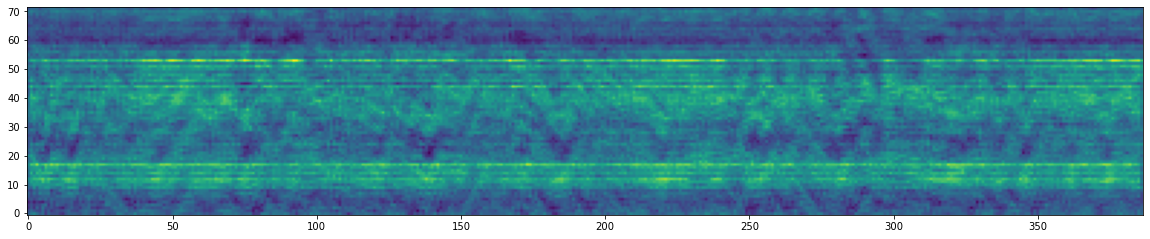

In [262]:
plt.figure(figsize=(20,20))
plt.imshow(out[0,0].detach().numpy(), origin='lower')

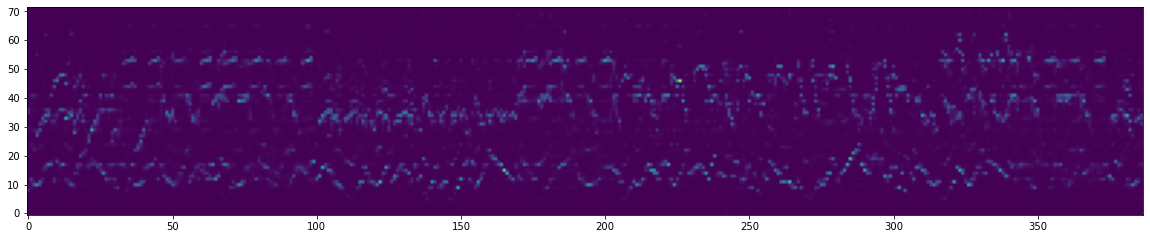

In [261]:
plt.figure(figsize=(20,20))
plt.imshow(std[0,0].detach().numpy(), origin='lower')

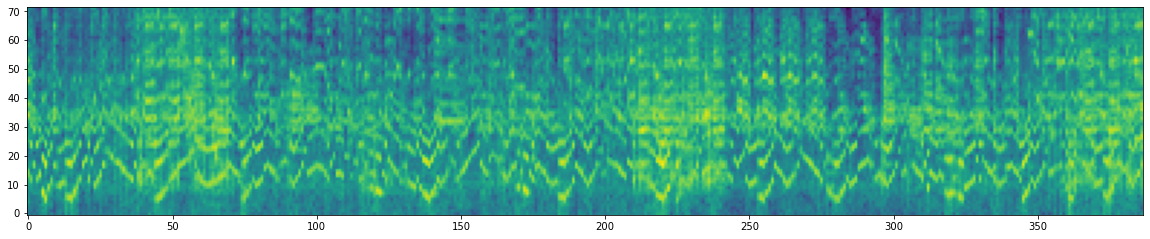

In [223]:
plt.figure(figsize=(20,20))
plt.imshow(in_data[0,0].detach().numpy(), origin='lower')

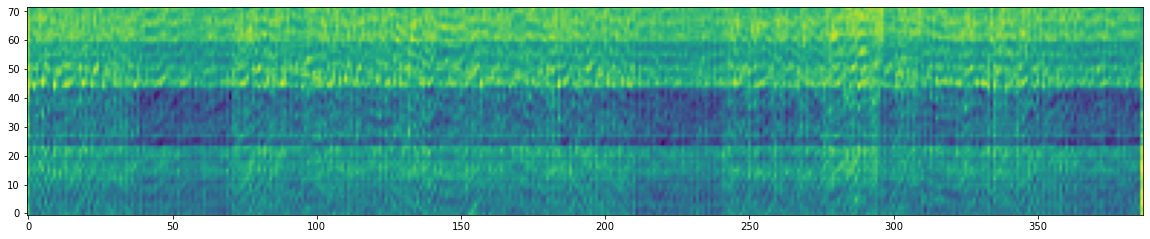

In [224]:
plt.figure(figsize=(20,20))
plt.imshow(out[0,0].detach().numpy(), origin='lower')

In [22]:
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from models.BaseSPPNet import NeuralDTW_CNN_Mask_dilation_SPP6_3_HarmonicConv, NeuralDTW_CNN_Mask_dilation_SPP6_3
from imp import reload
from hpcp_loader_for_softdtw import *

In [23]:
model = NeuralDTW_CNN_Mask_dilation_SPP6_3_HarmonicConv(None)

In [12]:
kwargs = {'model': 'NeuralDTW_CNN_Mask_dilation_SPP6_3_HarmonicConv', 
          'num_workers': 16, 
          'batch_size': 20,
          'is_label': True, 
          'is_random': True, 
          'notes': 'mask', 
          'save_model': True, 
          'manner': 'train',
          'params': 'params/neuraldtw/mask0',
          'test_length': 400, 
          'zo': False,
          'datatype': 'cqt', 
          'lr': 1e-05, 
          'weight_decay': 1e-06}

In [14]:
train_data0 = triplet_CQT(out_length=400, is_label=kwargs['is_label'], is_random=kwargs['is_random'], datatype=kwargs['datatype'])
train_dataloader0 = DataLoader(train_data0, 20, shuffle=True, num_workers=16)

In [18]:
for a, p, n, la, lp, ln in train_dataloader0:
    print(a.shape, p.shape, n.shape)
    break

torch.Size([20, 1, 72, 400]) torch.Size([20, 1, 72, 400]) torch.Size([20, 1, 72, 400])


In [28]:
timest = time.time()
out = model(a,p,n)
print(time.time()-timest)

29.46513605117798


In [31]:
model2 = NeuralDTW_CNN_Mask_dilation_SPP6_3(None)

In [32]:
timest = time.time()
out2 = model2(a,p,n)
print(time.time()-timest)

32.85206389427185


In [ ]:
model.model.HarmonicConv.weight